In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from model import print_results, MonoexponentialModel, make_exp_data

In [2]:
class MultiexponentialModel(tf.keras.Model):
    def __init__(self, 
                 filling_pulse=20 * 10 ** (-6), 
                 M=5.861,
                 n_exps=1, 
                 **kwargs):
        super().__init__(**kwargs)
        
        self.exps_list = list()
        
        for _ in range(n_exps):
            self.exps_list.append(MonoexponentialModel(filling_pulse=filling_pulse, M=M))
            
    def call(self, frequency):
        dlts = 0.0
        for i in range(len(self.exps_list)):
            dlts += self.exps_list[i](frequency)
        
        return dlts

# Общие параметры моделирования

In [3]:
NUM_EXAMPLES = 1000

TIME_CONSTANT0 = 0.2
TIME_CONSTANT1 = 0.004

AMPL0 = 3.0
AMPL1 = 2.0

F_PULSE = 20 * 10 ** (-6)

STDDEV = 0.2

LEARNING_RATE = 0.1
EPOCHS = 200

# Генерация экспериментальных данных

In [4]:
frequency, actual_dlts0 = make_exp_data(f_pulse=F_PULSE,
                                       time_constant=TIME_CONSTANT0,
                                       ampl=AMPL0,
                                       std_dev=STDDEV,
                                       num_ex=NUM_EXAMPLES)

frequency, actual_dlts1 = make_exp_data(f_pulse=F_PULSE,
                                       time_constant=TIME_CONSTANT1,
                                       ampl=AMPL1,
                                       std_dev=STDDEV,
                                       num_ex=NUM_EXAMPLES)

actual_dlts = actual_dlts0 + actual_dlts1

# Модель до оптимизации параметров

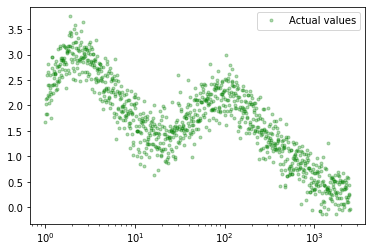

In [5]:
# initial_model = MultiexponentialModel(filling_pulse=F_PULSE,
#                                       n_exps=2
#                                      )

plt.semilogx(frequency, actual_dlts, '.g', label="Actual values", alpha=0.3)
# plt.semilogx(frequency, initial_model(frequency), '-.b', label="Initial model", alpha=0.5)
plt.legend()
plt.show()

# Оптимизация модели простым градиентным спуском

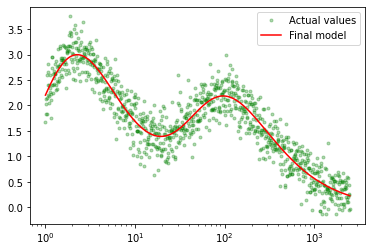

In [6]:
final_model = MultiexponentialModel(filling_pulse=F_PULSE, n_exps=2)

final_model.compile(run_eagerly=False,
                    loss=tf.keras.losses.MSE,
                    optimizer=tf.optimizers.SGD(learning_rate=LEARNING_RATE))

history = final_model.fit(frequency, actual_dlts, epochs=EPOCHS, batch_size=100, verbose=False)

plt.semilogx(frequency, actual_dlts, '.g', label="Actual values", alpha=0.3)
plt.semilogx(frequency, final_model(frequency), 'r', label="Final model")
plt.legend()
plt.show()

# Оптимизация параметров модели алгоритмом Adagrad

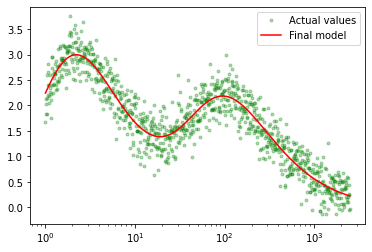

In [7]:
final_model = MultiexponentialModel(filling_pulse=F_PULSE, n_exps=2)

final_model.compile(run_eagerly=False,
                    loss=tf.keras.losses.MSE,
                    optimizer=tf.optimizers.Adagrad(learning_rate=LEARNING_RATE))

history = final_model.fit(frequency, actual_dlts, epochs=EPOCHS, batch_size=100, verbose=False)

plt.semilogx(frequency, actual_dlts, '.g', label="Actual values", alpha=0.3)
plt.semilogx(frequency, final_model(frequency), 'r', label="Final model")
plt.legend()
plt.show()

# Оптимизация параметров модели алгоритмом Adamax

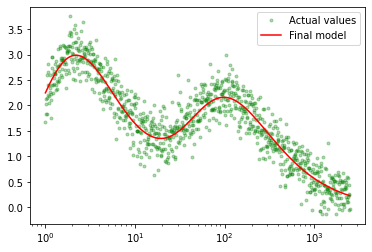

In [8]:
final_model = MultiexponentialModel(filling_pulse=F_PULSE, n_exps=2)

final_model.compile(run_eagerly=False,
                    loss=tf.keras.losses.MSE,
                    optimizer=tf.optimizers.Adamax(learning_rate=LEARNING_RATE))

history = final_model.fit(frequency, actual_dlts, epochs=EPOCHS, batch_size=100, verbose=False)

plt.semilogx(frequency, actual_dlts, '.g', label="Actual values", alpha=0.3)
plt.semilogx(frequency, final_model(frequency), 'r', label="Final model")
plt.legend()
plt.show()